### Importing required libraries

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from time import perf_counter 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPool2D,BatchNormalization
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ReduceLROnPlateau,ModelCheckpoint,EarlyStopping

### Building model architecture

In [ ]:
classifier=Sequential()

classifier.add(Conv2D(filters=96,kernel_size=(11,11),strides=(4,4),padding='valid',input_shape=(224,224,3),activation='relu'))
classifier.add(MaxPool2D((2,2),strides=(2,2),padding='valid'))
classifier.add(BatchNormalization())

classifier.add(Conv2D(filters=128,kernel_size=(5,5),strides=(1,1),padding='valid',activation='relu'))
classifier.add(MaxPool2D((2,2),strides=(2,2),padding='valid'))
classifier.add(BatchNormalization())

classifier.add(Conv2D(filters=512,kernel_size=(3,3),strides=(1,1),padding='valid',activation='relu'))
classifier.add(BatchNormalization())

classifier.add(Conv2D(filters=512,kernel_size=(3,3),strides=(1,1),padding='valid',activation='relu'))
classifier.add(BatchNormalization())

classifier.add(Conv2D(filters=1024,kernel_size=(3,3),strides=(1,1),padding='valid',activation='relu'))

classifier.add(MaxPool2D((2,2),strides=(2,2),padding='valid'))
classifier.add(BatchNormalization())

classifier.add(Flatten())

classifier.add(BatchNormalization())
classifier.add(Dense(1024,activation='relu'))
classifier.add(Dropout(0.4))
classifier.add(BatchNormalization())
classifier.add(Dense(512,activation='relu'))
classifier.add(Dropout(0.2))
classifier.add(BatchNormalization())
classifier.add(Dense(38,activation='softmax'))

classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 54, 54, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 23, 23, 128)       307328    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 11, 11, 128)       512       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 512)         5

### Compiling model with parameters

In [ ]:
from keras import optimizers
classifier.compile(optimizer=optimizers.SGD(lr=0.01, momentum=0.9, decay=0.005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                fill_mode='nearest')

valid_datagen=ImageDataGenerator(rescale=1./255)

batch_size=128
base_dir='../input/new-plant-diseases-dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)'

training_set=train_datagen.flow_from_directory(base_dir+'/train',
                                              target_size=(224,224),
                                              batch_size=batch_size,
                                              class_mode='categorical')

valid_set=valid_datagen.flow_from_directory(base_dir+'/valid',
                                          target_size=(224,224),
                                          batch_size=batch_size,
                                          class_mode='categorical')

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


### Displaying all the classes

In [ ]:
print(training_set.class_indices)

{'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Blueberry___healthy': 4, 'Cherry_(including_sour)___Powdery_mildew': 5, 'Cherry_(including_sour)___healthy': 6, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7, 'Corn_(maize)___Common_rust_': 8, 'Corn_(maize)___Northern_Leaf_Blight': 9, 'Corn_(maize)___healthy': 10, 'Grape___Black_rot': 11, 'Grape___Esca_(Black_Measles)': 12, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13, 'Grape___healthy': 14, 'Orange___Haunglongbing_(Citrus_greening)': 15, 'Peach___Bacterial_spot': 16, 'Peach___healthy': 17, 'Pepper,_bell___Bacterial_spot': 18, 'Pepper,_bell___healthy': 19, 'Potato___Early_blight': 20, 'Potato___Late_blight': 21, 'Potato___healthy': 22, 'Raspberry___healthy': 23, 'Soybean___healthy': 24, 'Squash___Powdery_mildew': 25, 'Strawberry___Leaf_scorch': 26, 'Strawberry___healthy': 27, 'Tomato___Bacterial_spot': 28, 'Tomato___Early_blight': 29, 'Tomato___Late_blight': 30, 'Tomato

In [ ]:
train_num=training_set.samples
valid_num=valid_set.samples

### Training the model

In [ ]:
weights=ModelCheckpoint('weights.hdf5',
                       save_best_only=True,
                       verbose=1,
                       save_weights_only=True)

early_stopping=EarlyStopping(monitor='val_acc',mode='max',patience=5)

history=classifier.fit_generator(training_set,
                                steps_per_epoch=train_num//batch_size,
                                validation_data=valid_set,
                                epochs=25,
                                validation_steps=valid_num//batch_size,
                                callbacks=[weights,early_stopping])

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
549/549 [==============================] - 1262s 2s/step - loss: 2.6606 - accuracy: 0.2933 - val_loss: 1.9203 - val_accuracy: 0.4560

Epoch 00001: val_loss improved from inf to 1.92033, saving model to weights.hdf5
Epoch 2/25
549/549 [==============================] - 929s 2s/step - loss: 1.2612 - accuracy: 0.6128 - val_loss: 1.0683 - val_accuracy: 0.6707

Epoch 00002: val_loss improved from 1.92033 to 1.06832, saving model to weights.hdf5
Epoch 3/25
549/549 [==============================] - 943s 2s/step - loss: 0.9420 - accuracy: 0.7069 - val_loss: 1.2471 - val_accuracy: 0.6452

Epoch 00003: val_loss did not improve from 1.06832
Epoch 4/25
549/549 [==============================] - 951s 2s/step - loss: 0.7569 - accuracy: 0.7614 - val_loss: 0.4828 - val_accuracy: 0.8479

Epoch 00004: val_loss improved from 1.06832 to 0.48284, saving model to weights.hdf5
Epoch 5/25
549/549 [==============================] - 942s 2s/step - loss: 0.6546 - accuracy: 0.7936 - val_loss: 0.6027 -

### Saving model

In [ ]:
classifier.save('1733model.h5')

### Ploting graphs

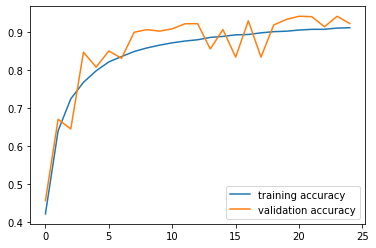

In [ ]:
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')

plt.legend()

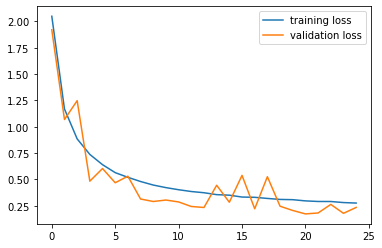

In [ ]:
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.legend()


### Loading model

In [1]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/Disease-Detection/1733model.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 54, 54, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 23, 23, 128)       307328    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 11, 11, 128)       512       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 512)         5

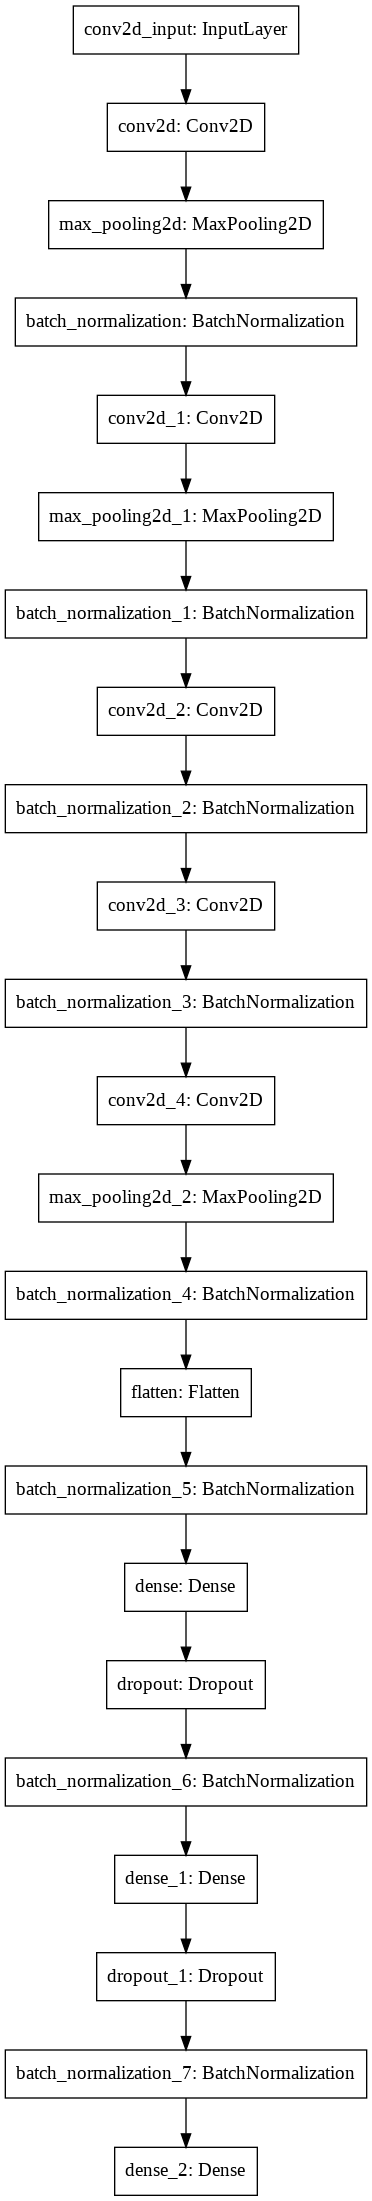

In [2]:
from keras.utils import plot_model
plot_model(model)

### Testing

Enter image path (eg. 'tomato.jpg): /content/drive/MyDrive/Disease-Detection/Dataset(Augmented)/valid/Squash___Powdery_mildew/007f0b62-a0f0-4c4a-9b1b-119616dd87c2___UMD_Powd.M 0279.JPG
Following is our prediction:


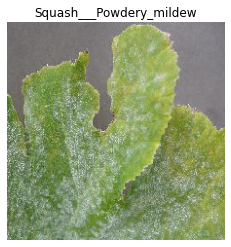

In [3]:
from numpy import loadtxt
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model

def main():
  # load model
  model = load_model('/content/drive/MyDrive/Disease-Detection/1733model.h5')
  cls={'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Blueberry___healthy': 4, 'Cherry_(including_sour)___Powdery_mildew': 5, 'Cherry_(including_sour)___healthy': 6, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7, 'Corn_(maize)___Common_rust_': 8, 'Corn_(maize)___Northern_Leaf_Blight': 9, 'Corn_(maize)___healthy': 10, 'Grape___Black_rot': 11, 'Grape___Esca_(Black_Measles)': 12, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13, 'Grape___healthy': 14, 'Orange___Haunglongbing_(Citrus_greening)': 15, 'Peach___Bacterial_spot': 16, 'Peach___healthy': 17, 'Pepper,_bell___Bacterial_spot': 18, 'Pepper,_bell___healthy': 19, 'Potato___Early_blight': 20, 'Potato___Late_blight': 21, 'Potato___healthy': 22, 'Raspberry___healthy': 23, 'Soybean___healthy': 24, 'Squash___Powdery_mildew': 25, 'Strawberry___Leaf_scorch': 26, 'Strawberry___healthy': 27, 'Tomato___Bacterial_spot': 28, 'Tomato___Early_blight': 29, 'Tomato___Late_blight': 30, 'Tomato___Leaf_Mold': 31, 'Tomato___Septoria_leaf_spot': 32, 'Tomato___Spider_mites Two-spotted_spider_mite': 33, 'Tomato___Target_Spot': 34, 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 35, 'Tomato___Tomato_mosaic_virus': 36, 'Tomato___healthy': 37}
  clss=[]
  for k,v in cls.items():
    clss.append(k)

  # image_path = "image27.jpeg"
  image_path = input("Enter image path (eg. 'tomato.jpg): ")
  new_img = image.load_img(image_path, target_size=(224, 224))
  img = image.img_to_array(new_img)
  img = np.expand_dims(img, axis=0)
  img = img/255

  print("Following is our prediction:")
  prediction = model.predict(img)
  d = prediction.flatten()
  j = d.max()
  for index,item in enumerate(d):
      if item == j:
          class_name = clss[index]

  #ploting image with predicted class name        
  plt.figure(figsize = (4,4))
  plt.imshow(new_img)
  plt.axis('off')
  plt.title(class_name)
  plt.show()

if __name__ == "__main__":
  main()


Enter image path (eg. 'tomato.jpg): /content/1572873.jpg
Following is our prediction:


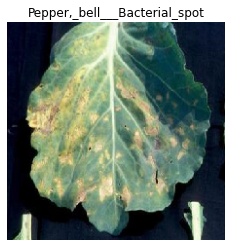

In [4]:
main()

Enter image path (eg. 'tomato.jpg): /content/image18.jpeg
Following is our prediction:


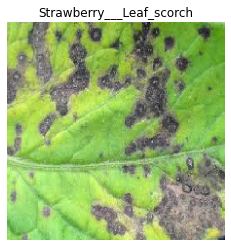

In [5]:
main()

Enter image path (eg. 'tomato.jpg): /content/images6.jpg
Following is our prediction:


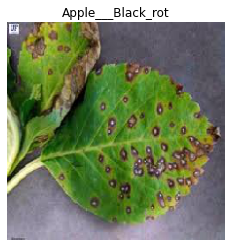

In [6]:
main()

Enter image path (eg. 'tomato.jpg): /content/PotatoEarlyBlight2.JPG
Following is our prediction:


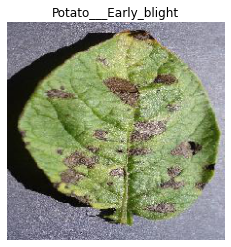

In [8]:
main()

Enter image path (eg. 'tomato.jpg): /content/AppleCedarRust4.JPG
Following is our prediction:


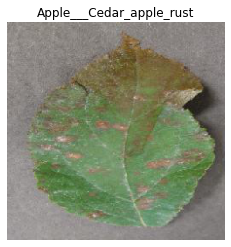

In [10]:
main()

Enter image path (eg. 'tomato.jpg): /content/5393182.jpg
Following is our prediction:


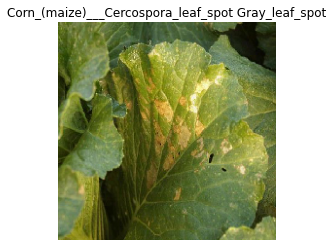

In [11]:
main()

In [ ]:
!pip install opencv-python

In [5]:
from keras.models import load_model
import cv2
import numpy as np
from keras.preprocessing import image
import os

#load saved model
model = load_model('1733model.h5')

# For naming the classes
cls={'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Blueberry___healthy': 4, 'Cherry_(including_sour)___Powdery_mildew': 5, 'Cherry_(including_sour)___healthy': 6, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7, 'Corn_(maize)___Common_rust_': 8, 'Corn_(maize)___Northern_Leaf_Blight': 9, 'Corn_(maize)___healthy': 10, 'Grape___Black_rot': 11, 'Grape___Esca_(Black_Measles)': 12, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13, 'Grape___healthy': 14, 'Orange___Haunglongbing_(Citrus_greening)': 15, 'Peach___Bacterial_spot': 16, 'Peach___healthy': 17, 'Pepper,_bell___Bacterial_spot': 18, 'Pepper,_bell___healthy': 19, 'Potato___Early_blight': 20, 'Potato___Late_blight': 21, 'Potato___healthy': 22, 'Raspberry___healthy': 23, 'Soybean___healthy': 24, 'Squash___Powdery_mildew': 25, 'Strawberry___Leaf_scorch': 26, 'Strawberry___healthy': 27, 'Tomato___Bacterial_spot': 28, 'Tomato___Early_blight': 29, 'Tomato___Late_blight': 30, 'Tomato___Leaf_Mold': 31, 'Tomato___Septoria_leaf_spot': 32, 'Tomato___Spider_mites Two-spotted_spider_mite': 33, 'Tomato___Target_Spot': 34, 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 35, 'Tomato___Tomato_mosaic_virus': 36, 'Tomato___healthy': 37}
clss=[]
for k,v in cls.items():
  clss.append(k)

#testing
webcam = cv2.VideoCapture(0)
while True:
    (_, im) = webcam.read()
    
    img = cv2.resize(im, (224,224))
    img = np.expand_dims(img, axis=0)
    img = img/255


    prediction = model.predict(img)
    d = prediction.flatten()
    j = d.max()
    for index,item in enumerate(d):
        if item == j:
            class_name = clss[index]
    strr = "Prediction: "+class_name
    cv2.putText(im,strr, (30, 30), cv2.FONT_HERSHEY_DUPLEX, 0.8, (0,0,0), 2)
    
    cv2.imshow('OpenCV', im)
    key = cv2.waitKey(10)
    if key == 27:
        break

webcam.release()
cv2.destroyAllWindows()
